In [ ]:
pip install rouge-score


  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=2f07f4e36450b63ce08b81d5c239525f374519ac9e771d24429f837b81b3e2e4
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [ ]:
ROUGE1=[]
ROUGE2=[]
ROUGEL=[]



In [ ]:
text=input("ENTER THE TEXT WHICH NEED TO BE SUMMERIZE")
reference_summary=input()

ENTER THE TEXT WHICH NEED TO BE SUMMERIZEIn mathematics, a complex number is an element of a number system that contains the real numbers and a specific element denoted i, called the imaginary unit, and satisfying the equation i2 = −1. Moreover, every complex number can be expressed in the form a + bi, where a and b are real numbers. Because no real number satisfies the above equation, i was called an imaginary number by René Descartes. For the complex number a + bi, a is called the real part and b is called the imaginary part.	
A complex number is an element of a number system that contains the real numbers and a specific element denoted i, called the imaginary unit, and satisfying the equation i2 = ⁇ 1.


In [ ]:
ROUGE1=[]
ROUGE2=[]
ROUGEL=[]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


GENERATED SUMMARY:
------------------
a complex number is an element of a number system that contains the real numbers and a specific element denoted i, called the imaginary unit. every complex number can be expressed in the form a + bi, where a is called the real part and b is called the imaginary part.


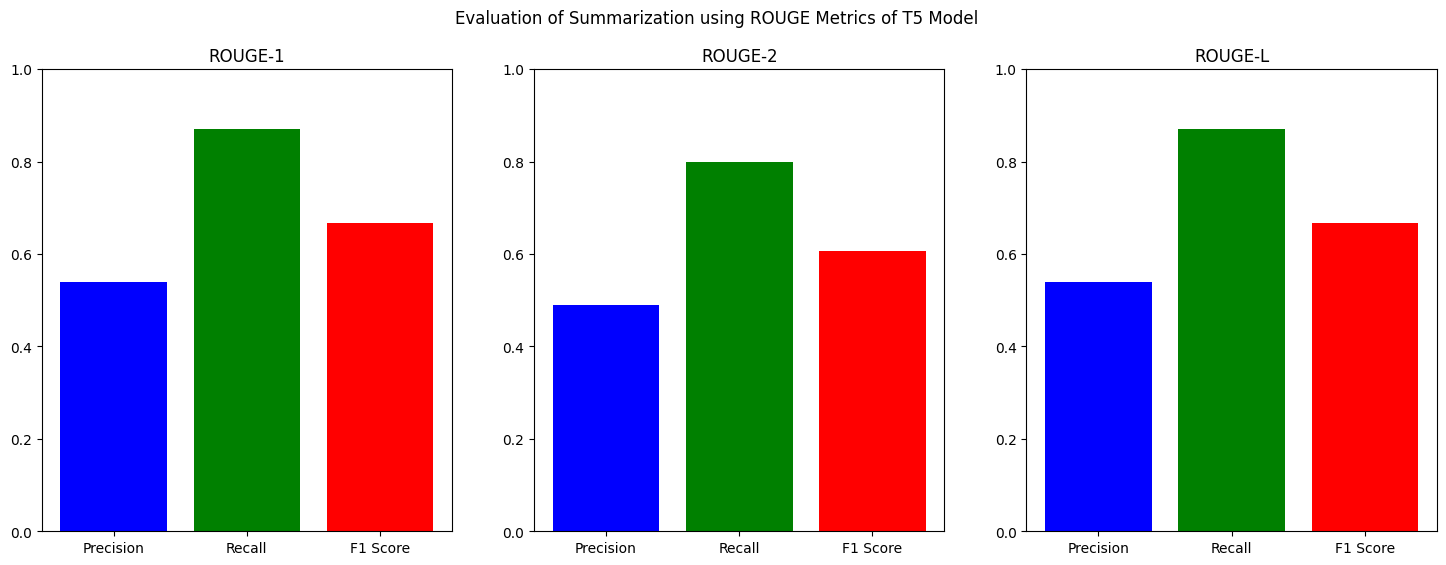

ROUGE-1 Precision: 0.54
ROUGE-1 Recall: 0.87
ROUGE-1 F1 Score: 0.67
ROUGE-2 Precision: 0.49
ROUGE-2 Recall: 0.80
ROUGE-2 F1 Score: 0.61
ROUGE-L Precision: 0.54
ROUGE-L Recall: 0.87
ROUGE-L F1 Score: 0.67


In [ ]:
import matplotlib.pyplot as plt
from transformers import T5ForConditionalGeneration, T5Tokenizer
from rouge_score import rouge_scorer

def summarize_text_t5(text, max_length=150):
    model_name = "t5-small"  # You can use other models like "t5-base" or "t5-large"
    tokenizer = T5Tokenizer.from_pretrained(model_name)
    model = T5ForConditionalGeneration.from_pretrained(model_name)

    input_text = "summarize: " + text
    inputs = tokenizer.encode(input_text, return_tensors="pt", max_length=512, truncation=True)

    summary_ids = model.generate(inputs, max_length=max_length, min_length=30, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

def evaluate_summary(generated_summary, reference_summary):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference_summary, generated_summary)
    return scores

def plot_scores(scores):
    # Extract the scores
    metrics = ['Precision', 'Recall', 'F1 Score']
    rouge1_values = [scores['rouge1'].precision, scores['rouge1'].recall, scores['rouge1'].fmeasure]
    rouge2_values = [scores['rouge2'].precision, scores['rouge2'].recall, scores['rouge2'].fmeasure]
    rougeL_values = [scores['rougeL'].precision, scores['rougeL'].recall, scores['rougeL'].fmeasure]

    # Create subplots
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('Evaluation of Summarization using ROUGE Metrics of T5 Model')

    # Plot ROUGE-1 scores
    axs[0].bar(metrics, rouge1_values, color=['blue', 'green', 'red'])
    axs[0].set_title('ROUGE-1')
    axs[0].set_ylim(0, 1)

    # Plot ROUGE-2 scores
    axs[1].bar(metrics, rouge2_values, color=['blue', 'green', 'red'])
    axs[1].set_title('ROUGE-2')
    axs[1].set_ylim(0, 1)

    # Plot ROUGE-L scores
    axs[2].bar(metrics, rougeL_values, color=['blue', 'green', 'red'])
    axs[2].set_title('ROUGE-L')
    axs[2].set_ylim(0, 1)

    plt.show()


# Generate summary
generated_summary = summarize_text_t5(text)

print("GENERATED SUMMARY:")
print("------------------")
print(generated_summary)

# Evaluate the generated summary
scores = evaluate_summary(generated_summary, reference_summary)

# Plot the evaluation scores
plot_scores(scores)

#Average score
x=scores['rouge1'].precision+scores['rouge1'].recall+scores['rouge1'].fmeasure
y=scores['rouge2'].precision+scores['rouge2'].recall+scores['rouge2'].fmeasure
z=scores['rougeL'].precision+scores['rougeL'].recall+scores['rougeL'].fmeasure

ROUGE1.append(x/3)
ROUGE2.append(y/3)
ROUGEL.append(z/3)

# Print the scores
print("ROUGE-1 Precision: {:.2f}".format(scores['rouge1'].precision))
print("ROUGE-1 Recall: {:.2f}".format(scores['rouge1'].recall))
print("ROUGE-1 F1 Score: {:.2f}".format(scores['rouge1'].fmeasure))
print("ROUGE-2 Precision: {:.2f}".format(scores['rouge2'].precision))
print("ROUGE-2 Recall: {:.2f}".format(scores['rouge2'].recall))
print("ROUGE-2 F1 Score: {:.2f}".format(scores['rouge2'].fmeasure))
print("ROUGE-L Precision: {:.2f}".format(scores['rougeL'].precision))
print("ROUGE-L Recall: {:.2f}".format(scores['rougeL'].recall))
print("ROUGE-L F1 Score: {:.2f}".format(scores['rougeL'].fmeasure))

def extract_scores(scores):
    return {
        'ROUGE-1 Precision': scores['rouge1'].precision,
        'ROUGE-1 Recall': scores['rouge1'].recall,
        'ROUGE-1 F1 Score': scores['rouge1'].fmeasure,
        'ROUGE-2 Precision': scores['rouge2'].precision,
        'ROUGE-2 Recall': scores['rouge2'].recall,
        'ROUGE-2 F1 Score': scores['rouge2'].fmeasure,
        'ROUGE-L Precision': scores['rougeL'].precision,
        'ROUGE-L Recall': scores['rougeL'].recall,
        'ROUGE-L F1 Score': scores['rougeL'].fmeasure
    }
scores_dict = extract_scores(scores)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:563: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:582: UserWarning: `num_beams` is set to 1. However, `length_penalty` is set to `2.0` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `length_penalty`.
  warnings.warn(


GENERATED SUMMARY:
------------------
a complex number is an element of a number system that contains the real numbers and a specific element denoted i. a + bi is called the real part and b is called the imaginary part.


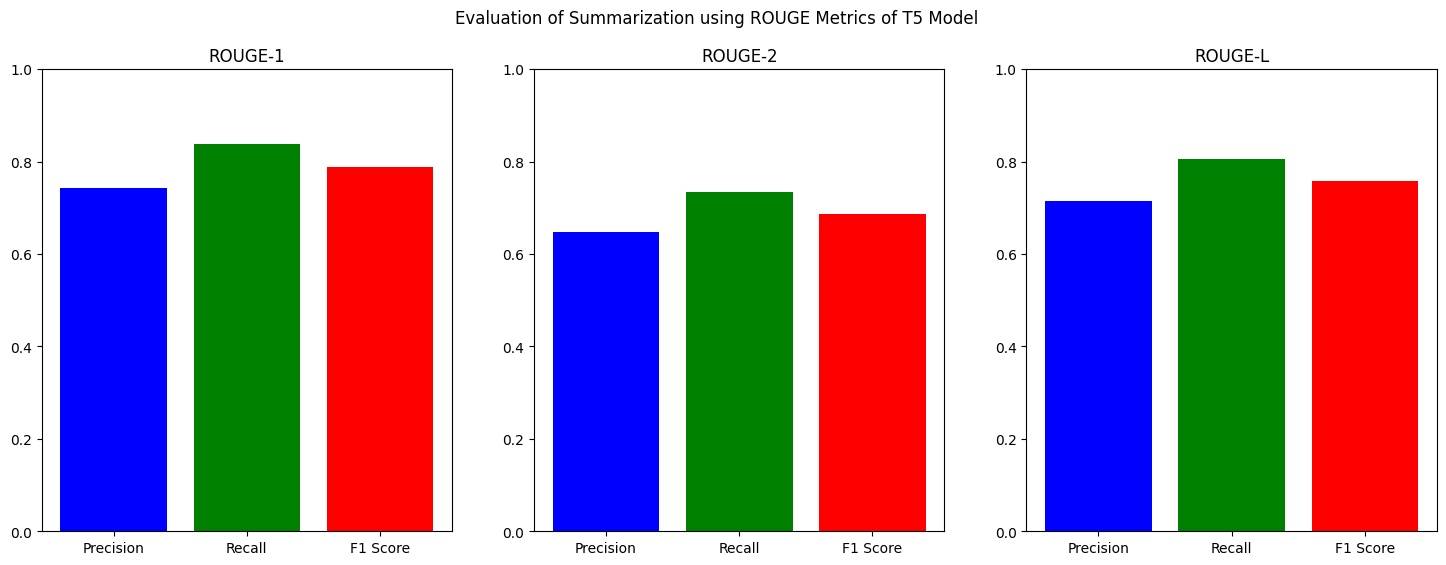

ROUGE-1 Precision: 0.74
ROUGE-1 Recall: 0.84
ROUGE-1 F1 Score: 0.79
ROUGE-2 Precision: 0.65
ROUGE-2 Recall: 0.73
ROUGE-2 F1 Score: 0.69
ROUGE-L Precision: 0.71
ROUGE-L Recall: 0.81
ROUGE-L F1 Score: 0.76


In [ ]:
# With coherence issue

import matplotlib.pyplot as plt
from transformers import T5ForConditionalGeneration, T5Tokenizer
from rouge_score import rouge_scorer

def summarize_text_t5(text, max_length=150):
    model_name = "t5-small"  # You can use other models like "t5-base" or "t5-large"
    tokenizer = T5Tokenizer.from_pretrained(model_name)
    model = T5ForConditionalGeneration.from_pretrained(model_name)

    input_text = "summarize: " + text
    inputs = tokenizer.encode(input_text, return_tensors="pt", max_length=512, truncation=True)

    summary_ids = model.generate(inputs, max_length=max_length, min_length=30, length_penalty=2.0, num_beams=1, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

def evaluate_summary(generated_summary, reference_summary):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference_summary, generated_summary)
    return scores

def plot_scores(scores):
    # Extract the scores
    metrics = ['Precision', 'Recall', 'F1 Score']
    rouge1_values = [scores['rouge1'].precision, scores['rouge1'].recall, scores['rouge1'].fmeasure]
    rouge2_values = [scores['rouge2'].precision, scores['rouge2'].recall, scores['rouge2'].fmeasure]
    rougeL_values = [scores['rougeL'].precision, scores['rougeL'].recall, scores['rougeL'].fmeasure]

    # Create subplots
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('Evaluation of Summarization using ROUGE Metrics of T5 Model')

    # Plot ROUGE-1 scores
    axs[0].bar(metrics, rouge1_values, color=['blue', 'green', 'red'])
    axs[0].set_title('ROUGE-1')
    axs[0].set_ylim(0, 1)

    # Plot ROUGE-2 scores
    axs[1].bar(metrics, rouge2_values, color=['blue', 'green', 'red'])
    axs[1].set_title('ROUGE-2')
    axs[1].set_ylim(0, 1)

    # Plot ROUGE-L scores
    axs[2].bar(metrics, rougeL_values, color=['blue', 'green', 'red'])
    axs[2].set_title('ROUGE-L')
    axs[2].set_ylim(0, 1)

    plt.show()


# Generate summary
generated_summary = summarize_text_t5(text)

print("GENERATED SUMMARY:")
print("------------------")
print(generated_summary)

# Evaluate the generated summary
scores = evaluate_summary(generated_summary, reference_summary)

# Plot the evaluation scores
plot_scores(scores)

#Average score
x=scores['rouge1'].precision+scores['rouge1'].recall+scores['rouge1'].fmeasure
y=scores['rouge2'].precision+scores['rouge2'].recall+scores['rouge2'].fmeasure
z=scores['rougeL'].precision+scores['rougeL'].recall+scores['rougeL'].fmeasure

ROUGE1.append(x/3)
ROUGE2.append(y/3)
ROUGEL.append(z/3)

# Print the scores
print("ROUGE-1 Precision: {:.2f}".format(scores['rouge1'].precision))
print("ROUGE-1 Recall: {:.2f}".format(scores['rouge1'].recall))
print("ROUGE-1 F1 Score: {:.2f}".format(scores['rouge1'].fmeasure))
print("ROUGE-2 Precision: {:.2f}".format(scores['rouge2'].precision))
print("ROUGE-2 Recall: {:.2f}".format(scores['rouge2'].recall))
print("ROUGE-2 F1 Score: {:.2f}".format(scores['rouge2'].fmeasure))
print("ROUGE-L Precision: {:.2f}".format(scores['rougeL'].precision))
print("ROUGE-L Recall: {:.2f}".format(scores['rougeL'].recall))
print("ROUGE-L F1 Score: {:.2f}".format(scores['rougeL'].fmeasure))

def extract_scores_issue(scores):
    return {
        'ROUGE-1 Precision': scores['rouge1'].precision,
        'ROUGE-1 Recall': scores['rouge1'].recall,
        'ROUGE-1 F1 Score': scores['rouge1'].fmeasure,
        'ROUGE-2 Precision': scores['rouge2'].precision,
        'ROUGE-2 Recall': scores['rouge2'].recall,
        'ROUGE-2 F1 Score': scores['rouge2'].fmeasure,
        'ROUGE-L Precision': scores['rougeL'].precision,
        'ROUGE-L Recall': scores['rougeL'].recall,
        'ROUGE-L F1 Score': scores['rougeL'].fmeasure
    }
scores_issue_dict = extract_scores_issue(scores)

In [ ]:
df_scores = pd.DataFrame([scores_dict, scores_issue_dict], index=['Without Coherence Issue', 'With Coherence Issue'])
df_scores.T

,Without Coherence Issue,With Coherence Issue
ROUGE-1 Precision,0.540000,0.742857
ROUGE-1 Recall,0.870968,0.838710
ROUGE-1 F1 Score,0.666667,0.787879
ROUGE-2 Precision,0.489796,0.647059
ROUGE-2 Recall,0.800000,0.733333
ROUGE-2 F1 Score,0.607595,0.687500
ROUGE-L Precision,0.540000,0.714286
ROUGE-L Recall,0.870968,0.806452
ROUGE-L F1 Score,0.666667,0.757576


Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


GENERATED SUMMARY:
------------------
A complex number is an element of a number system that contains the real numbers and a specific element denoted i, called the imaginary unit, and satisfying the equation i2 = 1.


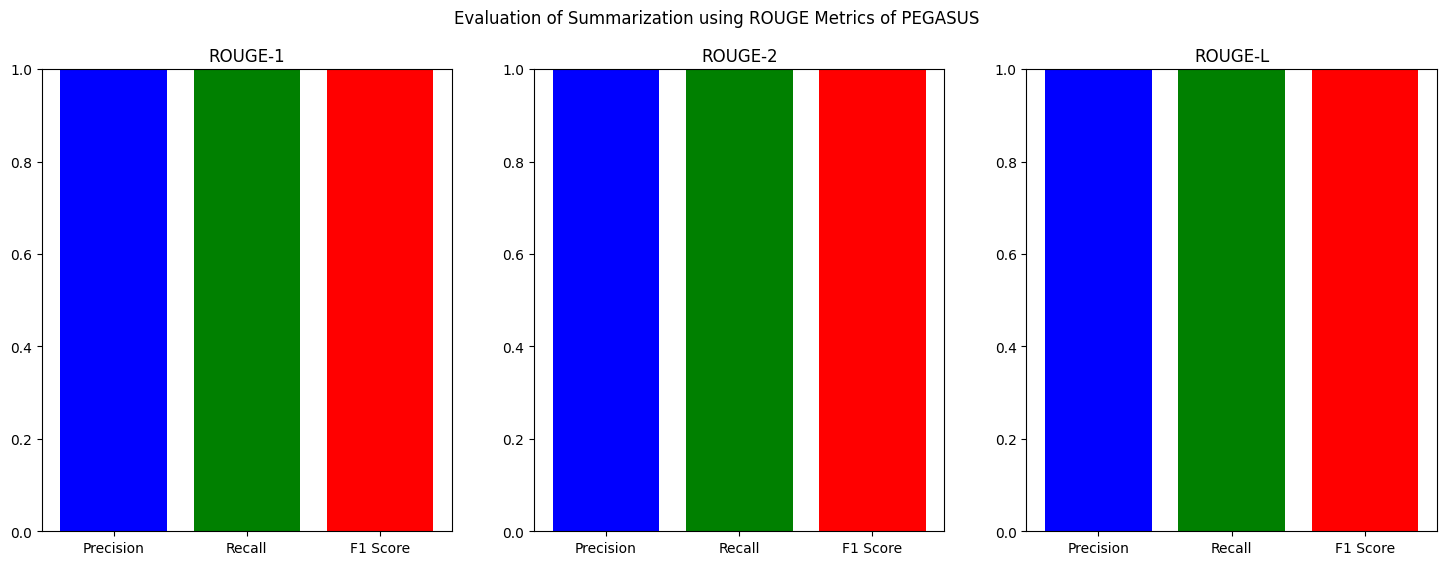

ROUGE-1 Precision: 1.00
ROUGE-1 Recall: 1.00
ROUGE-1 F1 Score: 1.00
ROUGE-2 Precision: 1.00
ROUGE-2 Recall: 1.00
ROUGE-2 F1 Score: 1.00
ROUGE-L Precision: 1.00
ROUGE-L Recall: 1.00
ROUGE-L F1 Score: 1.00


In [ ]:
#pegasus model
from transformers import PegasusTokenizer, PegasusForConditionalGeneration

def summarize_text_pegasus(text, model_name="google/pegasus-xsum", max_length=150):
    tokenizer = PegasusTokenizer.from_pretrained(model_name)
    model = PegasusForConditionalGeneration.from_pretrained(model_name)

    inputs = tokenizer(text, truncation=True, padding="longest", return_tensors="pt")
    summary_ids = model.generate(inputs["input_ids"], max_length=max_length, min_length=30, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

def evaluate_summary(generated_summary, reference_summary):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference_summary, generated_summary)
    return scores

def plot_scores(scores):
    # Extract the scores
    metrics = ['Precision', 'Recall', 'F1 Score']
    rouge1_values = [scores['rouge1'].precision, scores['rouge1'].recall, scores['rouge1'].fmeasure]
    rouge2_values = [scores['rouge2'].precision, scores['rouge2'].recall, scores['rouge2'].fmeasure]
    rougeL_values = [scores['rougeL'].precision, scores['rougeL'].recall, scores['rougeL'].fmeasure]

    # Create subplots
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('Evaluation of Summarization using ROUGE Metrics of PEGASUS')

    # Plot ROUGE-1 scores
    axs[0].bar(metrics, rouge1_values, color=['blue', 'green', 'red'])
    axs[0].set_title('ROUGE-1')
    axs[0].set_ylim(0, 1)

    # Plot ROUGE-2 scores
    axs[1].bar(metrics, rouge2_values, color=['blue', 'green', 'red'])
    axs[1].set_title('ROUGE-2')
    axs[1].set_ylim(0, 1)

    # Plot ROUGE-L scores
    axs[2].bar(metrics, rougeL_values, color=['blue', 'green', 'red'])
    axs[2].set_title('ROUGE-L')
    axs[2].set_ylim(0, 1)

    plt.show()


# Generate summary
generated_summary = summarize_text_pegasus(text)

print("GENERATED SUMMARY:")
print("------------------")
print(generated_summary)

# Evaluate the generated summary
scores = evaluate_summary(generated_summary, reference_summary)

# Plot the evaluation scores
plot_scores(scores)

x=scores['rouge1'].precision+scores['rouge1'].recall+scores['rouge1'].fmeasure
y=scores['rouge2'].precision+scores['rouge2'].recall+scores['rouge2'].fmeasure
z=scores['rougeL'].precision+scores['rougeL'].recall+scores['rougeL'].fmeasure

ROUGE1.append(x/3)
ROUGE2.append(y/3)
ROUGEL.append(z/3)


# Print the scores
print("ROUGE-1 Precision: {:.2f}".format(scores['rouge1'].precision))
print("ROUGE-1 Recall: {:.2f}".format(scores['rouge1'].recall))
print("ROUGE-1 F1 Score: {:.2f}".format(scores['rouge1'].fmeasure))
print("ROUGE-2 Precision: {:.2f}".format(scores['rouge2'].precision))
print("ROUGE-2 Recall: {:.2f}".format(scores['rouge2'].recall))
print("ROUGE-2 F1 Score: {:.2f}".format(scores['rouge2'].fmeasure))
print("ROUGE-L Precision: {:.2f}".format(scores['rougeL'].precision))
print("ROUGE-L Recall: {:.2f}".format(scores['rougeL'].recall))
print("ROUGE-L F1 Score: {:.2f}".format(scores['rougeL'].fmeasure))


def extract_scores(scores):
    return {
        'ROUGE-1 Precision': scores['rouge1'].precision,
        'ROUGE-1 Recall': scores['rouge1'].recall,
        'ROUGE-1 F1 Score': scores['rouge1'].fmeasure,
        'ROUGE-2 Precision': scores['rouge2'].precision,
        'ROUGE-2 Recall': scores['rouge2'].recall,
        'ROUGE-2 F1 Score': scores['rouge2'].fmeasure,
        'ROUGE-L Precision': scores['rougeL'].precision,
        'ROUGE-L Recall': scores['rougeL'].recall,
        'ROUGE-L F1 Score': scores['rougeL'].fmeasure
    }
scores_pegasus_dict = extract_scores(scores)


Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:563: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:582: UserWarning: `num_beams` is set to 1. However, `length_penalty` is set to `2.0` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `length_penalty`.
  warnings.warn(


GENERATED SUMMARY:
------------------
The complex number a + bi is a real number, but the complex number i is an imaginary number.<n> For the complex number a + bi, a is called the real part and b is called the imaginary part.


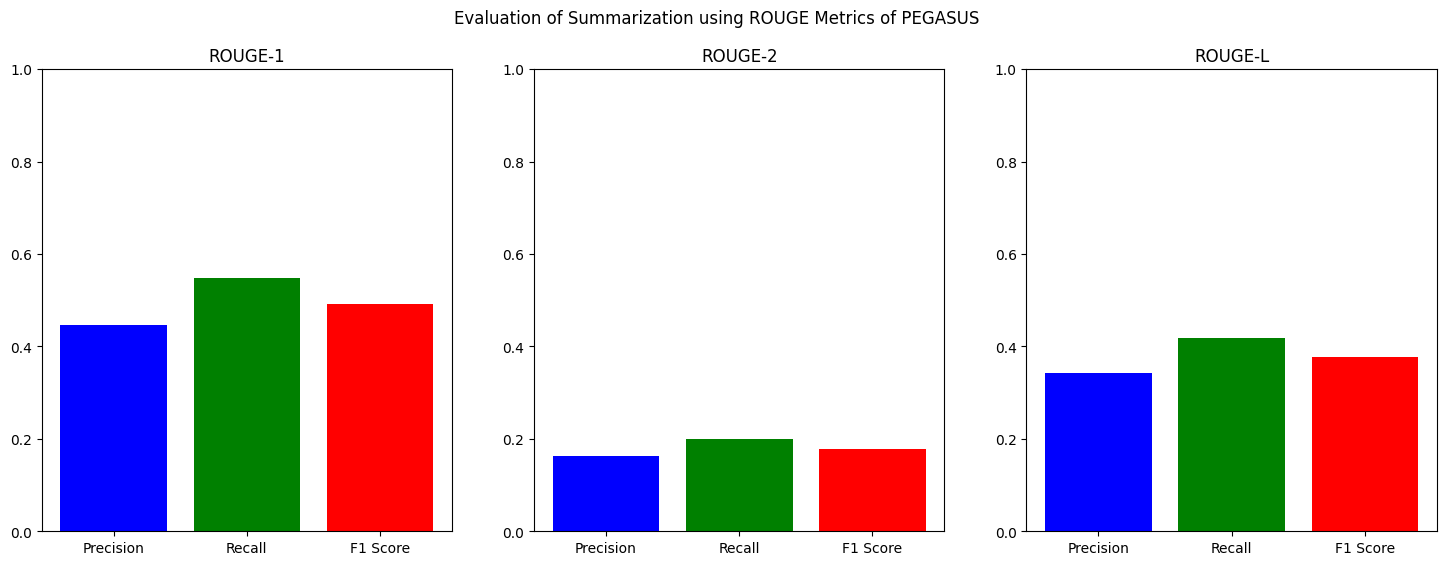

ROUGE-1 Precision: 0.45
ROUGE-1 Recall: 0.55
ROUGE-1 F1 Score: 0.49
ROUGE-2 Precision: 0.16
ROUGE-2 Recall: 0.20
ROUGE-2 F1 Score: 0.18
ROUGE-L Precision: 0.34
ROUGE-L Recall: 0.42
ROUGE-L F1 Score: 0.38


In [ ]:
#with coherence
from transformers import PegasusTokenizer, PegasusForConditionalGeneration

def summarize_text_pegasus(text, model_name="google/pegasus-xsum", max_length=150):
    tokenizer = PegasusTokenizer.from_pretrained(model_name)
    model = PegasusForConditionalGeneration.from_pretrained(model_name)

    inputs = tokenizer(text, truncation=True, padding="longest", return_tensors="pt")
    summary_ids = model.generate(inputs["input_ids"], max_length=max_length, min_length=30, length_penalty=2.0, num_beams=1, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

def evaluate_summary(generated_summary, reference_summary):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference_summary, generated_summary)
    return scores

def plot_scores(scores):
    # Extract the scores
    metrics = ['Precision', 'Recall', 'F1 Score']
    rouge1_values = [scores['rouge1'].precision, scores['rouge1'].recall, scores['rouge1'].fmeasure]
    rouge2_values = [scores['rouge2'].precision, scores['rouge2'].recall, scores['rouge2'].fmeasure]
    rougeL_values = [scores['rougeL'].precision, scores['rougeL'].recall, scores['rougeL'].fmeasure]

    # Create subplots
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('Evaluation of Summarization using ROUGE Metrics of PEGASUS')

    # Plot ROUGE-1 scores
    axs[0].bar(metrics, rouge1_values, color=['blue', 'green', 'red'])
    axs[0].set_title('ROUGE-1')
    axs[0].set_ylim(0, 1)

    # Plot ROUGE-2 scores
    axs[1].bar(metrics, rouge2_values, color=['blue', 'green', 'red'])
    axs[1].set_title('ROUGE-2')
    axs[1].set_ylim(0, 1)

    # Plot ROUGE-L scores
    axs[2].bar(metrics, rougeL_values, color=['blue', 'green', 'red'])
    axs[2].set_title('ROUGE-L')
    axs[2].set_ylim(0, 1)

    plt.show()


# Generate summary
generated_summary = summarize_text_pegasus(text)

print("GENERATED SUMMARY:")
print("------------------")
print(generated_summary)

# Evaluate the generated summary
scores = evaluate_summary(generated_summary, reference_summary)

# Plot the evaluation scores
plot_scores(scores)

x=scores['rouge1'].precision+scores['rouge1'].recall+scores['rouge1'].fmeasure
y=scores['rouge2'].precision+scores['rouge2'].recall+scores['rouge2'].fmeasure
z=scores['rougeL'].precision+scores['rougeL'].recall+scores['rougeL'].fmeasure

ROUGE1.append(x/3)
ROUGE2.append(y/3)
ROUGEL.append(z/3)


# Print the scores
print("ROUGE-1 Precision: {:.2f}".format(scores['rouge1'].precision))
print("ROUGE-1 Recall: {:.2f}".format(scores['rouge1'].recall))
print("ROUGE-1 F1 Score: {:.2f}".format(scores['rouge1'].fmeasure))
print("ROUGE-2 Precision: {:.2f}".format(scores['rouge2'].precision))
print("ROUGE-2 Recall: {:.2f}".format(scores['rouge2'].recall))
print("ROUGE-2 F1 Score: {:.2f}".format(scores['rouge2'].fmeasure))
print("ROUGE-L Precision: {:.2f}".format(scores['rougeL'].precision))
print("ROUGE-L Recall: {:.2f}".format(scores['rougeL'].recall))
print("ROUGE-L F1 Score: {:.2f}".format(scores['rougeL'].fmeasure))


def extract_scores_issue(scores):
    return {
        'ROUGE-1 Precision': scores['rouge1'].precision,
        'ROUGE-1 Recall': scores['rouge1'].recall,
        'ROUGE-1 F1 Score': scores['rouge1'].fmeasure,
        'ROUGE-2 Precision': scores['rouge2'].precision,
        'ROUGE-2 Recall': scores['rouge2'].recall,
        'ROUGE-2 F1 Score': scores['rouge2'].fmeasure,
        'ROUGE-L Precision': scores['rougeL'].precision,
        'ROUGE-L Recall': scores['rougeL'].recall,
        'ROUGE-L F1 Score': scores['rougeL'].fmeasure
    }
scores_pegasus_issue_dict = extract_scores_issue(scores)

In [ ]:
df_scores = pd.DataFrame([scores_pegasus_dict, scores_pegasus_issue_dict], index=['Without Coherence Issue', 'With Coherence Issue'])
df_scores.T

,Without Coherence Issue,With Coherence Issue
ROUGE-1 Precision,1.0,0.447368
ROUGE-1 Recall,1.0,0.548387
ROUGE-1 F1 Score,1.0,0.492754
ROUGE-2 Precision,1.0,0.162162
ROUGE-2 Recall,1.0,0.200000
ROUGE-2 F1 Score,1.0,0.179104
ROUGE-L Precision,1.0,0.342105
ROUGE-L Recall,1.0,0.419355
ROUGE-L F1 Score,1.0,0.376812
